In [20]:
#a. Performing exploratory analysis on the data to understand the patterns

In [57]:
#import libraries 
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
#from sklearn.base import BaseEstimator, ClassifierMixin
#from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV

import  textblob
import xgboost
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()
pd.set_option('display.max_rows', 10000)
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Raksa
[nltk_data]     Kun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Raksa
[nltk_data]     Kun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Raksa
[nltk_data]     Kun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Raksa Kun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [58]:
# data = constant_data.DataConstant
dataset = pd.read_excel("../Data/Womens Clothing Reviews Data.xlsx")
dataset

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [59]:
dataset.shape

(23486, 11)

In [60]:
dataset.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [61]:
#Make columns names in proper format by assigning proper variables
dataset.columns=['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag']

In [62]:
dataset.head()

,Product_ID,Category,SubCategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [63]:
#Check columns name 
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

In [64]:
# Find duplicate rows
duplicated_rows = dataset.duplicated()

# Count the number of duplicate rows
number_of_duplicate_rows = duplicated_rows.sum()

print("Number of duplicated rows:", number_of_duplicate_rows)

Number of duplicated rows: 3


In [65]:
#Remove duplicate data
dataset=dataset.drop_duplicates()

In [67]:
dataset.shape

(23483, 11)

In [68]:
# Validate with duplicate rows again
duplicated_rows = dataset.duplicated()

# Count the number of duplicate rows
number_of_duplicate_rows = duplicated_rows.sum()

print("Number of duplicated rows:", number_of_duplicate_rows)

Number of duplicated rows: 0


In [69]:
#Check null values in dataset
dataset.isnull().sum()

Product_ID           0
Category            14
SubCategory1        14
SubCategory2        14
Location             0
Channel              0
Customer_Age         0
Review_Title      3807
Review_Text        842
Rating               0
Recommend_Flag       0
dtype: int64

In [70]:
#delete all missing values 
dataset.dropna(axis = 0, how= "any", inplace = True)

In [71]:
#Check null values again 
dataset.isnull().sum()

Product_ID        0
Category          0
SubCategory1      0
SubCategory2      0
Location          0
Channel           0
Customer_Age      0
Review_Title      0
Review_Text       0
Rating            0
Recommend_Flag    0
dtype: int64

In [72]:
dataset.shape

(19662, 11)

In [73]:
#Check info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   SubCategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer_Age    19662 non-null  int64 
 7   Review_Title    19662 non-null  object
 8   Review_Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend_Flag  19662 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [36]:
#Explore the basic analysis 

In [74]:
dataset.columns

Index(['Product_ID', 'Category', 'SubCategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

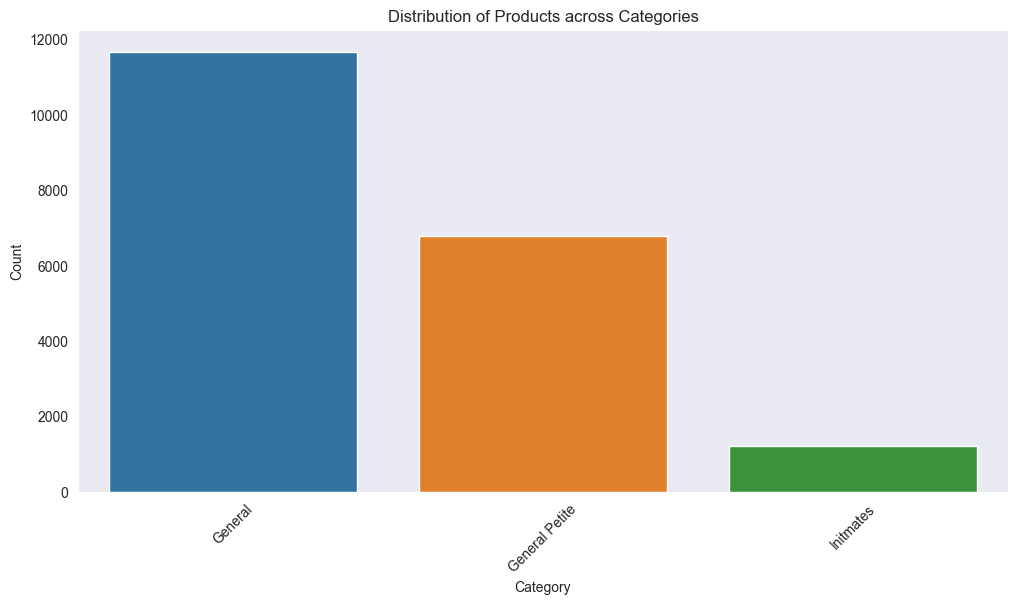

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=dataset)
plt.title('Distribution of Products across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


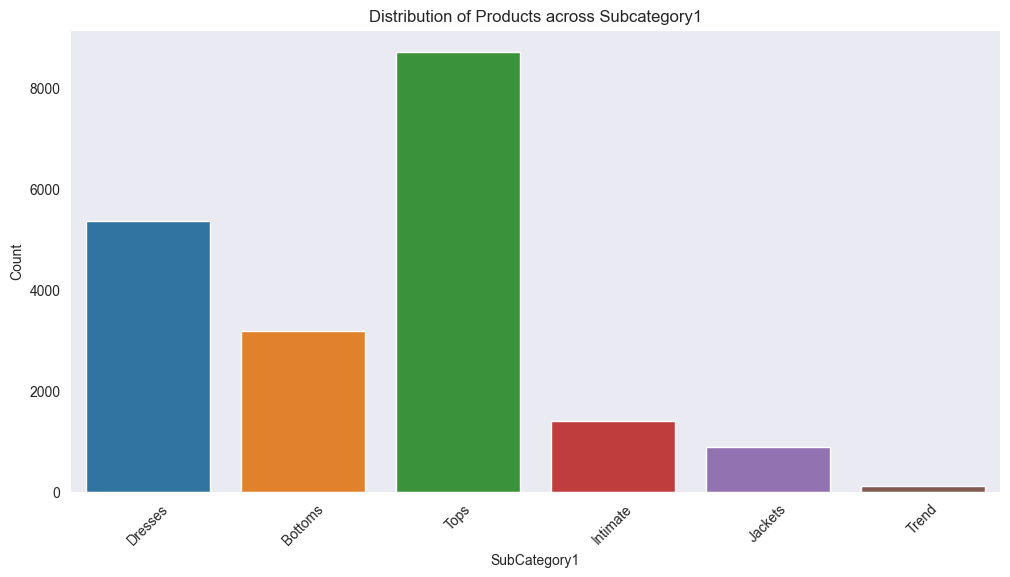

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SubCategory1', data=dataset)
plt.title('Distribution of Products across Subcategory1')
plt.xlabel('SubCategory1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

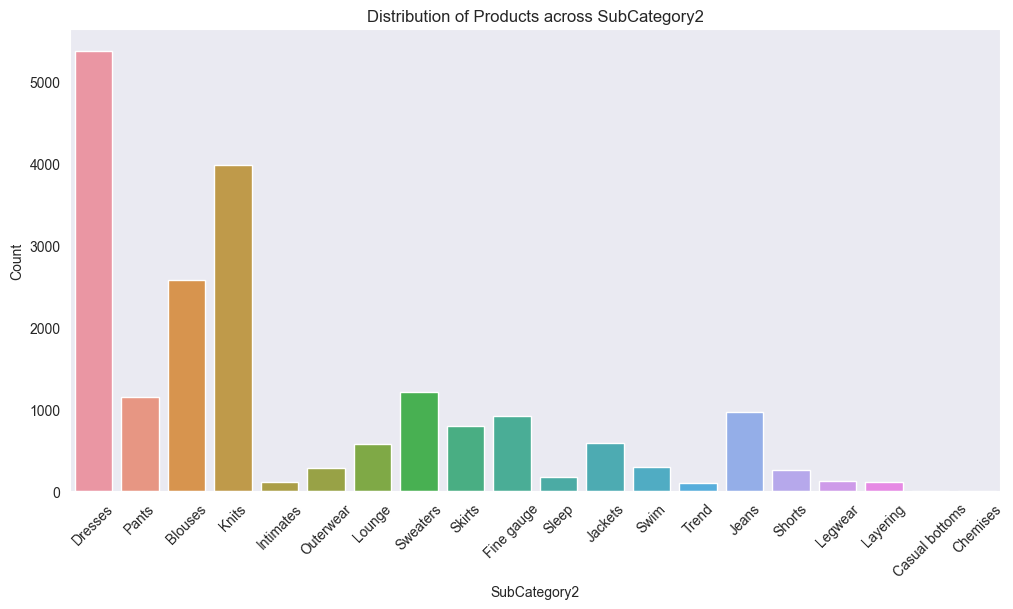

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SubCategory2', data=dataset)
plt.title('Distribution of Products across SubCategory2')
plt.xlabel('SubCategory2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

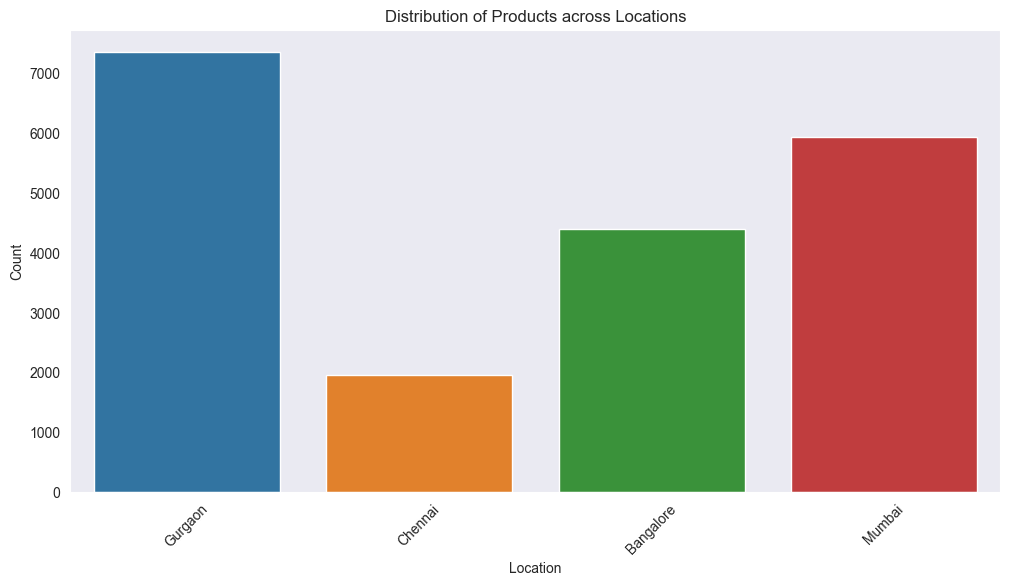

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=dataset)
plt.title('Distribution of Products across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

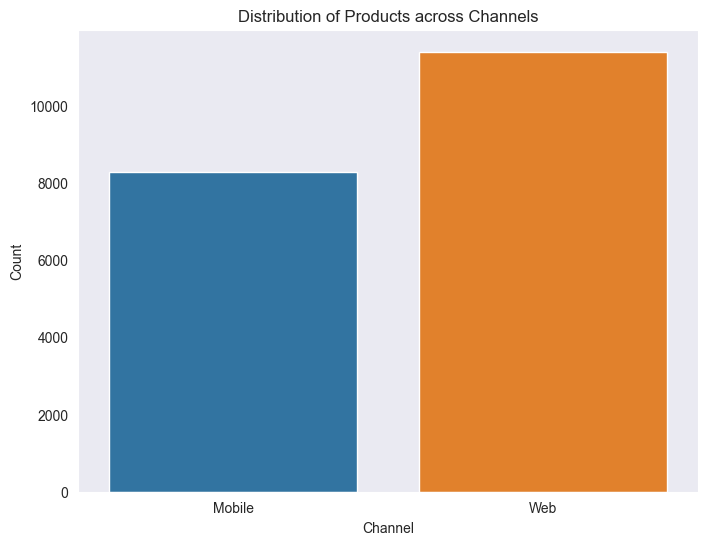

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Channel', data=dataset)
plt.title('Distribution of Products across Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

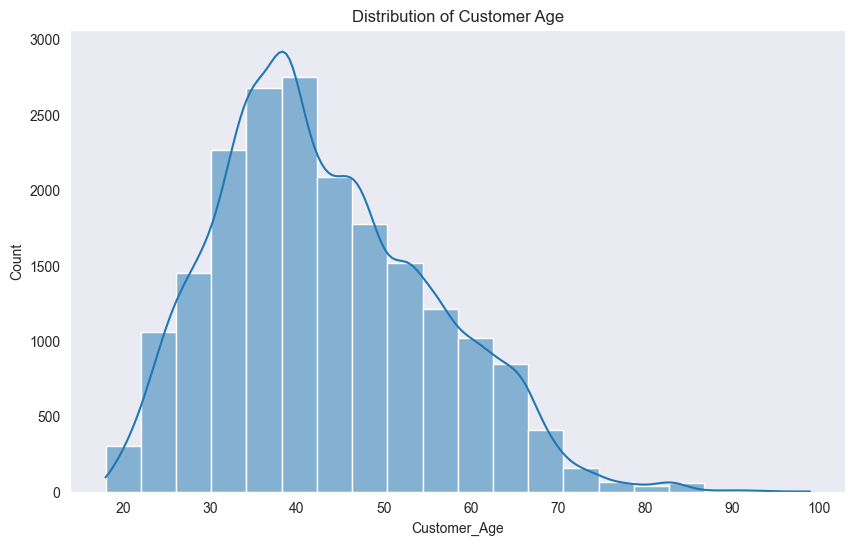

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Customer_Age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer_Age')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Recommend_Flag', ylabel='count'>

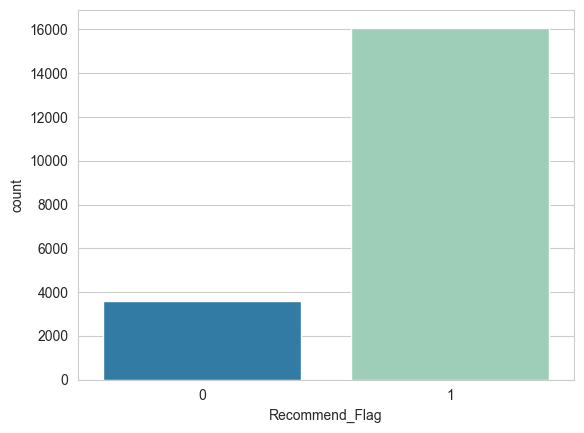

In [86]:
#Some visulallizatoin of data using sns.countplot, sns.dist plots
#Create Bar Chart to know the number of customers who gave the recommend flag (1 or 0) for products
#Recommend flag = 1 ,it means the product is good 
#Recommend flag = 0 ,it means the product is not good 

sns.set_style('whitegrid')
sns.countplot(x='Recommend_Flag',data=dataset, palette='YlGnBu_r')

In [39]:
""" 
By following the above graph, we can see that there are 16000 customers who 
recommend Flag 1 for products more than people who recommend Flag 0, approximately 3800 people.
 """

' \nBy following the above graph, we can see that there are 16000 customers who \nrecommend Flag 1 for products more than people who recommend Flag 0, approximately 3800 people.\n '

In [40]:
""" 
    In this below graph we want to know the number of customers who rate on our products by giving stars start from 1 to 5.
    It typically goes from 1, the lowest rating, to 5, the highest rating.
    
 """

' \n    In this below graph we want to know the number of customers who rate on our products by giving stars start from 1 to 5.\n    It typically goes from 1, the lowest rating, to 5, the highest rating.\n    \n '

<Axes: xlabel='Rating', ylabel='count'>

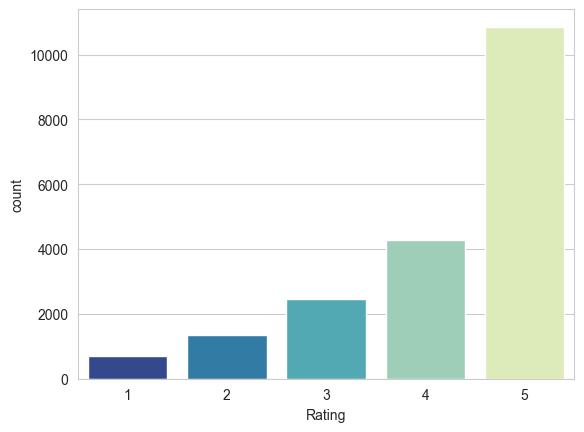

In [87]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=dataset, palette='YlGnBu_r')

In [42]:
""" 
    
By following the above graph, we see that most of the customers who gave 5 
stars were more than 10000 customers, 4 stars were more than 4000 but under 5000 customers, 
3 stars were more than 2000 but under 3000, 2 stars were almost 2000, and 1 star was not more than 1500. 
Overall, we can say our product gets a good rating from customers.

 """

' \n    \nBy following the above graph, we see that most of the customers who gave 5 \nstars were more than 10000 customers, 4 stars were more than 4000 but under 5000 customers, \n3 stars were more than 2000 but under 3000, 2 stars were almost 2000, and 1 star was not more than 1500. \nOverall, we can say our product gets a good rating from customers.\n\n '

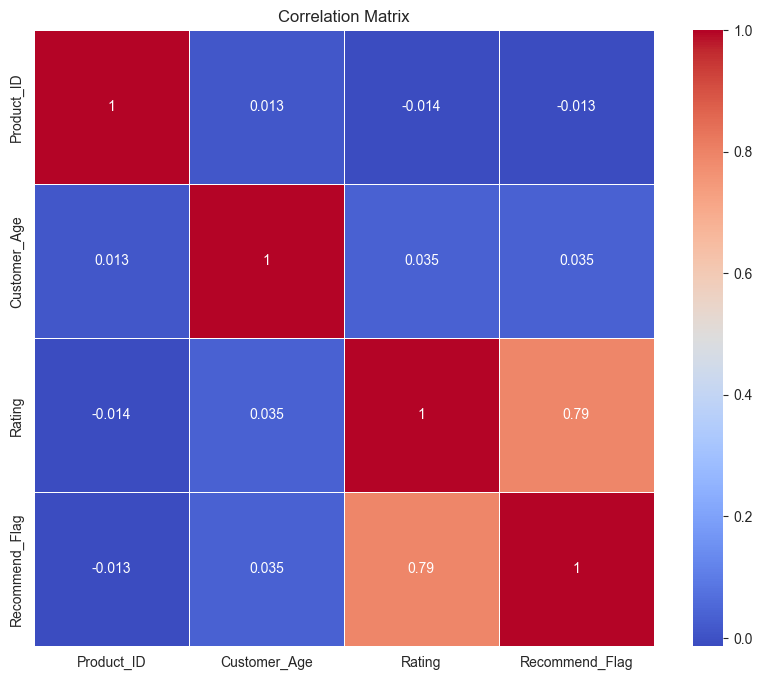

In [88]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Rating', ylabel='count'>

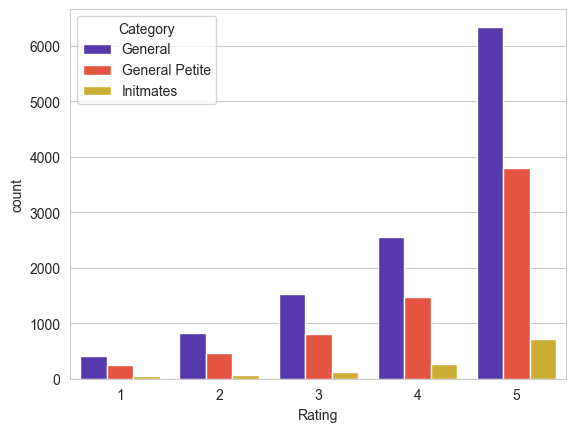

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Category',data= dataset,palette='CMRmap')

<Axes: xlabel='Rating', ylabel='count'>

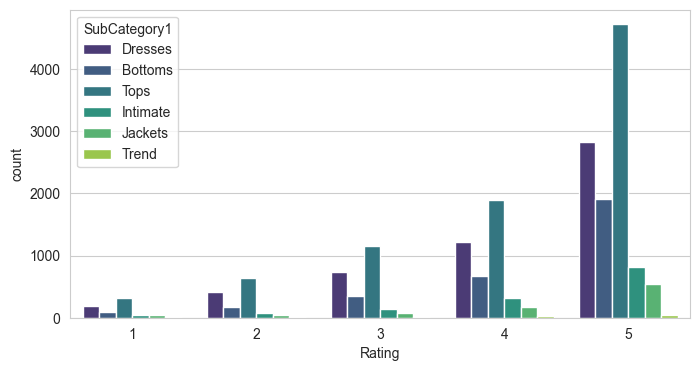

In [44]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='SubCategory1',data= dataset,palette='viridis')

<Axes: xlabel='Recommend_Flag', ylabel='count'>

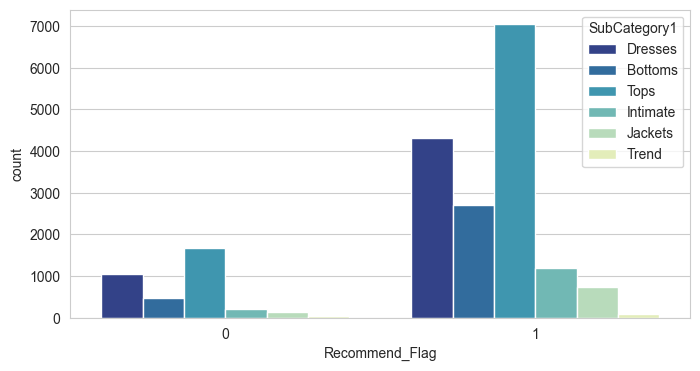

In [45]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Recommend_Flag',hue='SubCategory1',data=dataset,palette='YlGnBu_r')

<Axes: xlabel='Customer_Age', ylabel='Density'>

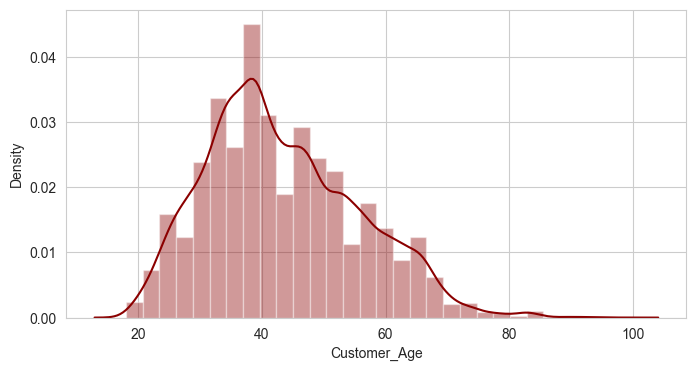

In [46]:
plt.figure(figsize=(8,4))
sns.distplot(dataset['Customer_Age'],color='darkred',bins=30)

In [47]:
#Some More Basic Exploratory Analysis on Review_Text

In [48]:
# count sentence in each review
dataset['Review_Text'] = dataset['Review_Text'].astype(str)
dataset['count_sent']=dataset['Review_Text'].apply(lambda x: len(re.findall("\n",str(x)))+1)
# Print the result
print(dataset[['Review_Text', 'count_sent']])

                                             Review_Text  count_sent
2      I had such high hopes for this dress and reall...           1
3      I love, love, love this jumpsuit. it's fun, fl...           1
4      This shirt is very flattering to all due to th...           1
5      I love tracy reese dresses, but this one is no...           1
6      I aded this in my basket at hte last mintue to...           1
...                                                  ...         ...
23481  I was very happy to snag this dress at such a ...           1
23482  It reminds me of maternity clothes. soft, stre...           2
23483  This fit well, but the top was very see throug...           1
23484  I bought this dress for a wedding i have this ...           1
23485  This dress in a lovely platinum is feminine an...           1

[19662 rows x 2 columns]


In [49]:
#Word count in each comment:
dataset['count_word']=dataset['Review_Text'].apply(lambda x: len(str(x).split()))
#Print the result 
dataset['count_word']

2         98
3         22
4         36
5         98
6        101
        ... 
23481     28
23482     38
23483     42
23484     86
23485     19
Name: count_word, Length: 19662, dtype: int64

In [50]:
#Unique word count
dataset['count_unique_word']=dataset['Review_Text'].apply(lambda x: len(set(str(x).split())))
#Print the result 
dataset['count_unique_word']

2        72
3        20
4        28
5        65
6        74
         ..
23481    23
23482    36
23483    36
23484    65
23485    18
Name: count_unique_word, Length: 19662, dtype: int64

In [51]:
#Letter count
dataset['count_letters']=dataset['Review_Text'].apply(lambda x: len(str(x)))
dataset['count_letters']

2        500
3        124
4        192
5        488
6        496
        ... 
23481    131
23482    223
23483    208
23484    427
23485    110
Name: count_letters, Length: 19662, dtype: int64

In [52]:
#Word density
dataset['word_density'] = dataset['count_letters'] / (dataset['count_word']+1)
dataset['word_density']

2        5.050505
3        5.391304
4        5.189189
5        4.929293
6        4.862745
           ...   
23481    4.517241
23482    5.717949
23483    4.837209
23484    4.908046
23485    5.500000
Name: word_density, Length: 19662, dtype: float64

In [53]:
#punctuation count
dataset["count_punctuations"] =dataset['Review_Text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
dataset["count_punctuations"]

2        14
3         9
4         5
5         9
6        22
         ..
23481     3
23482    12
23483     8
23484    12
23485     4
Name: count_punctuations, Length: 19662, dtype: int64

In [54]:
#upper case words count
dataset["count_words_upper"] = dataset['Review_Text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
dataset["count_words_upper"]

2        1
3        1
4        0
5        1
6        1
        ..
23481    1
23482    0
23483    0
23484    1
23485    0
Name: count_words_upper, Length: 19662, dtype: int64

In [55]:
#lower case words count
dataset["count_words_lower"] = dataset["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))
dataset["count_words_lower"]

2        96
3        21
4        35
5        96
6        97
         ..
23481    27
23482    37
23483    41
23484    84
23485    18
Name: count_words_lower, Length: 19662, dtype: int64

In [56]:
#title case words count
dataset["count_words_title"] = dataset["Review_Text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
dataset["count_words_title"]

2        1
3        1
4        1
5        1
6        1
        ..
23481    1
23482    1
23483    1
23484    1
23485    1
Name: count_words_title, Length: 19662, dtype: int64